In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout,LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks
from sklearn.metrics import precision_score,recall_score,confusion_matrix,accuracy_score,f1_score,classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv")

In [ ]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<ipython-input-7-f3d77eb7c863>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=data["DEATH_EVENT"],palette=cols)


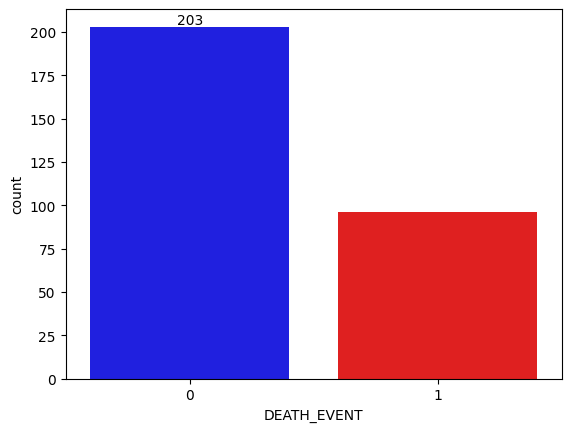

In [ ]:
cols=["#0000FF","#FF0000"]
ax=sns.countplot(x=data["DEATH_EVENT"],palette=cols)
ax.bar_label(ax.containers[0])
plt.show()


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


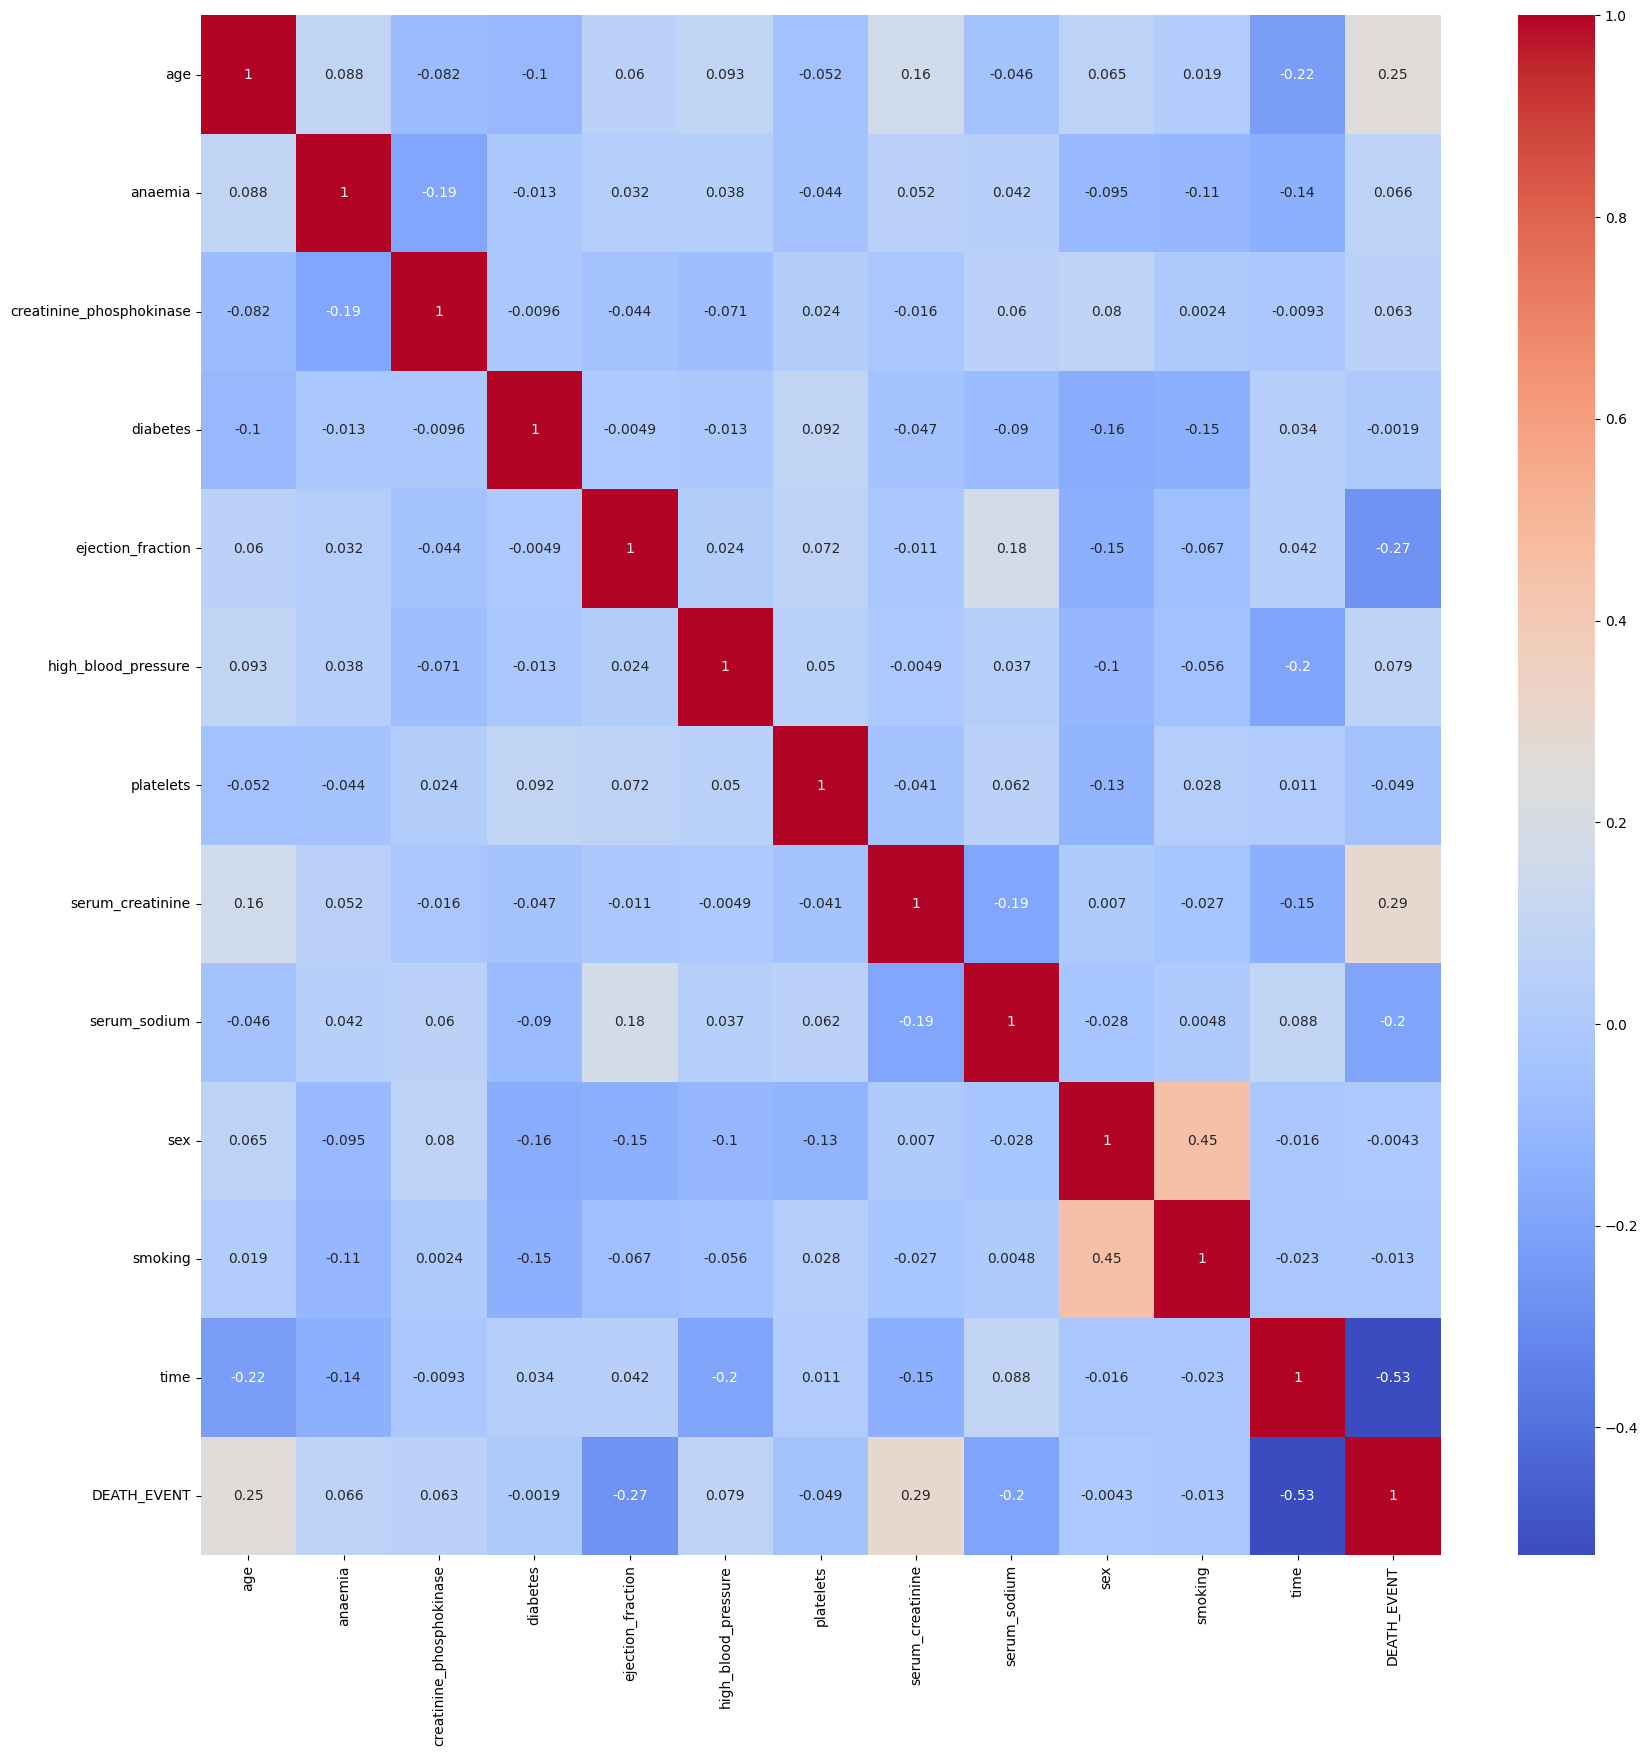

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.show()

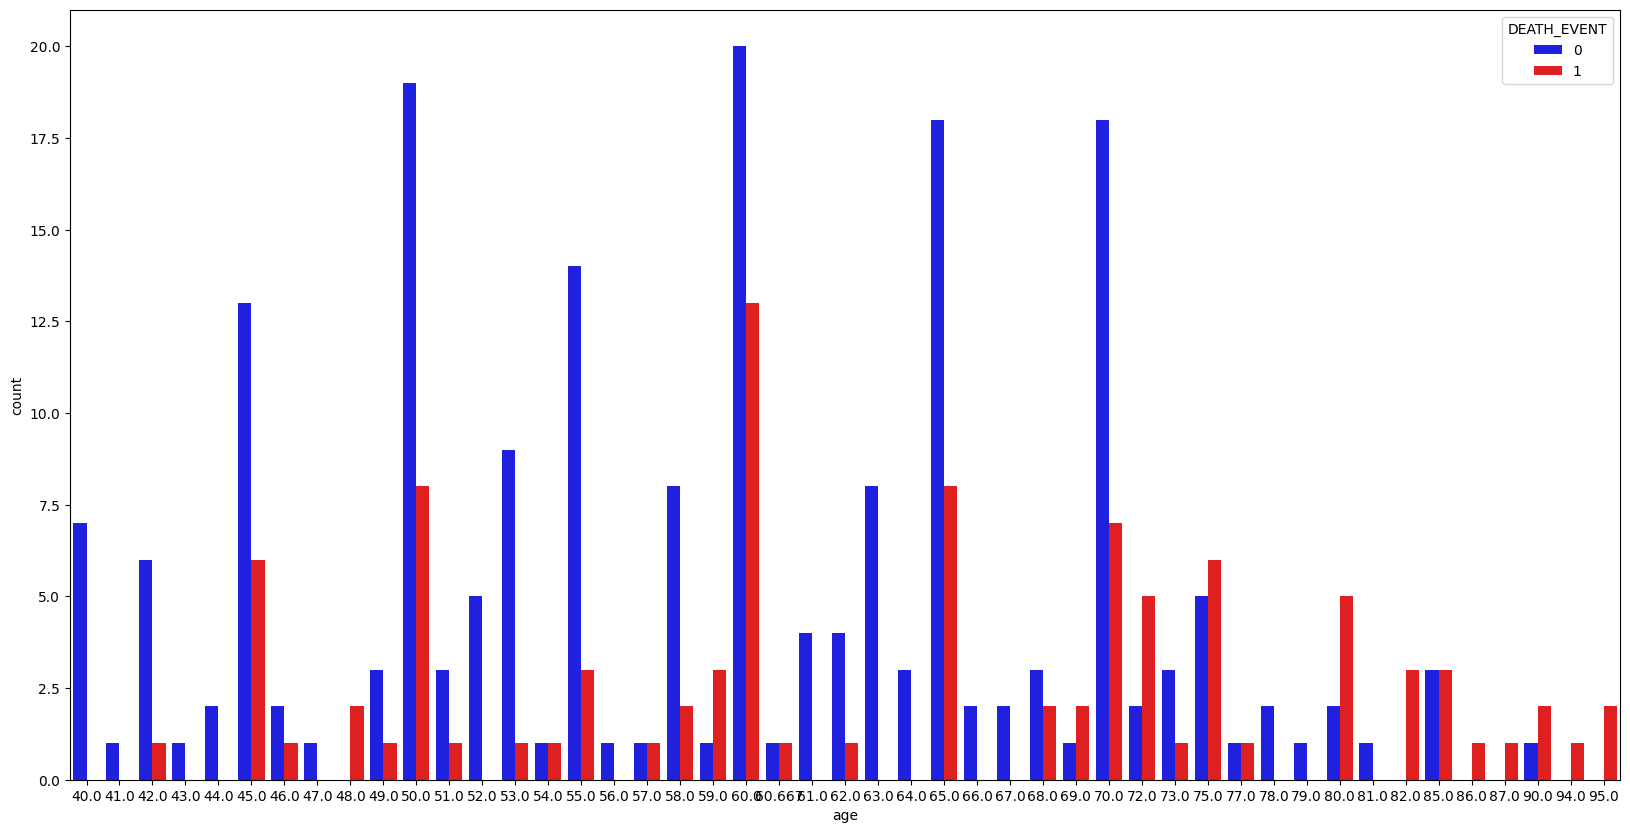

In [ ]:
plt.figure(figsize=(20,10))
days_of_week=sns.countplot(x=data['age'], data=data, hue="DEATH_EVENT", palette=cols)


<ipython-input-12-41b93aab26fc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)


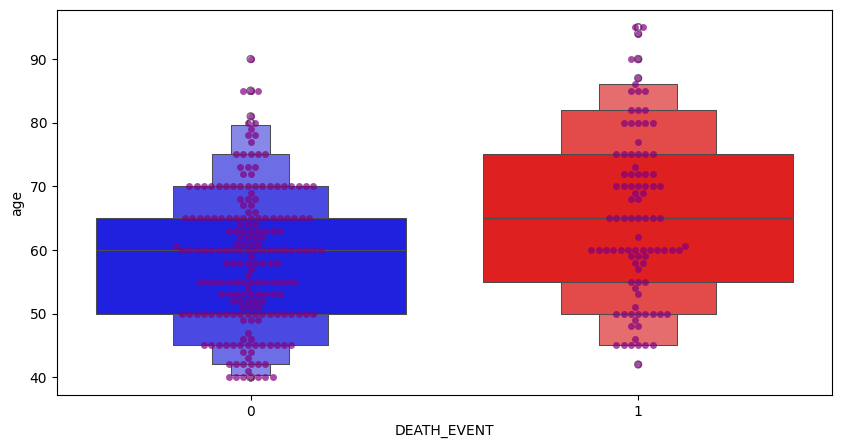

<ipython-input-12-41b93aab26fc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


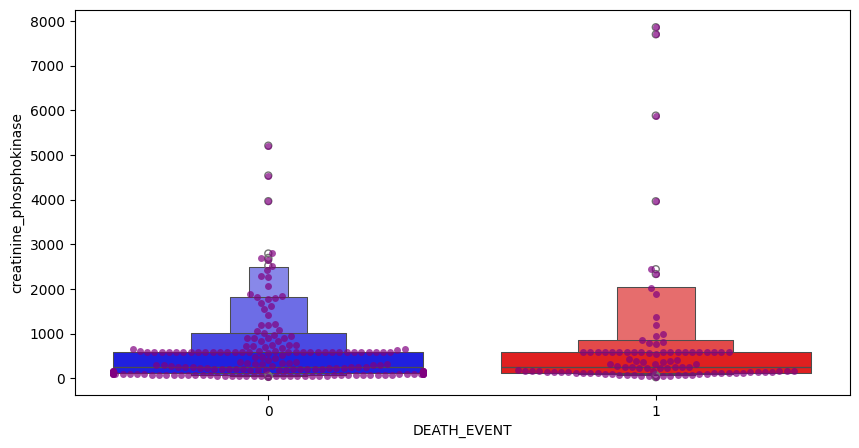

<ipython-input-12-41b93aab26fc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)


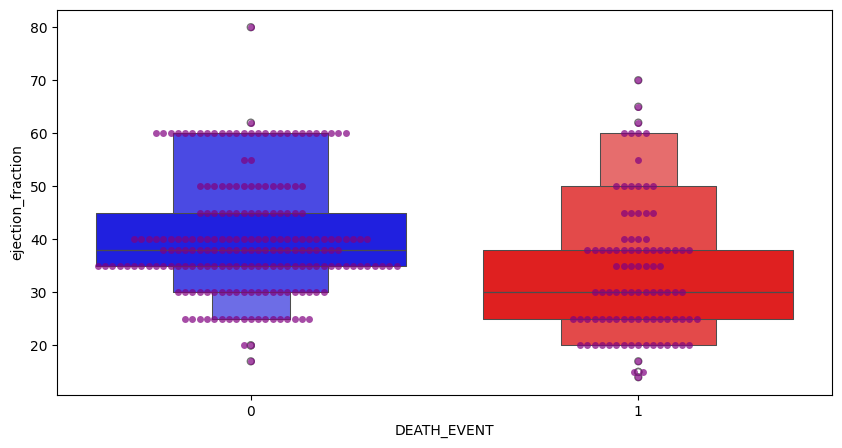

<ipython-input-12-41b93aab26fc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)


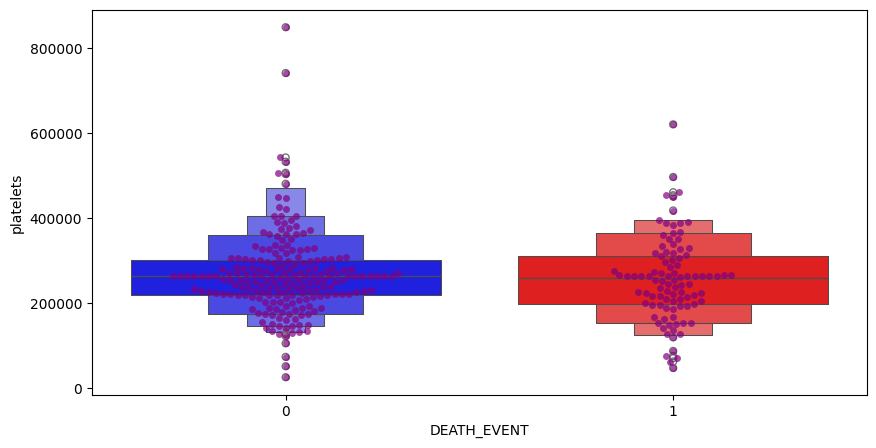

<ipython-input-12-41b93aab26fc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


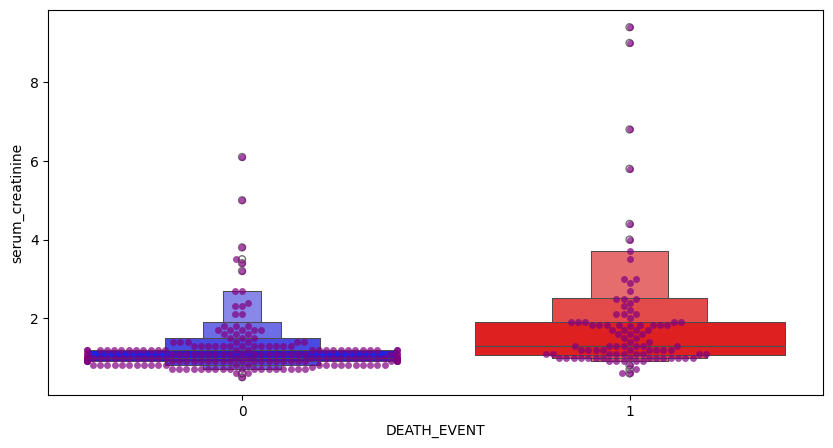

<ipython-input-12-41b93aab26fc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)


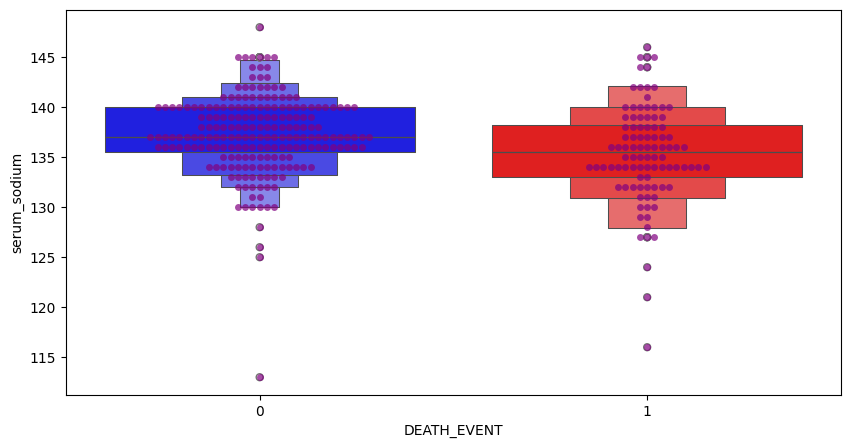

<ipython-input-12-41b93aab26fc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)


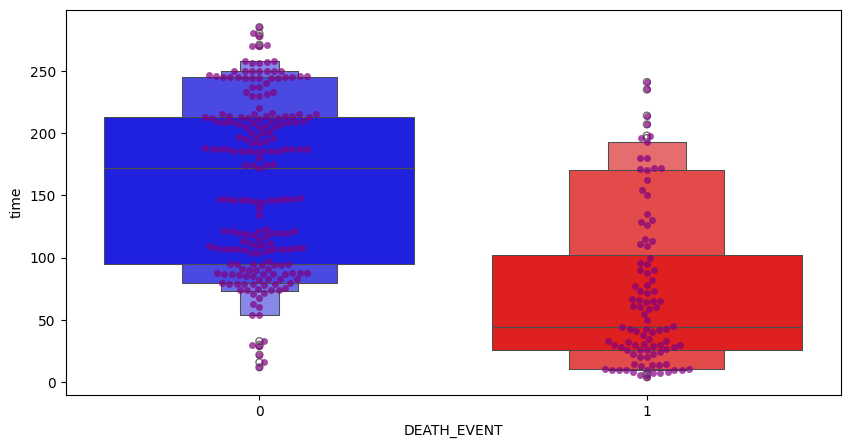

In [ ]:
feature=["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]
for i in feature:
  plt.figure(figsize=(10,5))
  sns.swarmplot(x=data["DEATH_EVENT"], y=data[i], color="purple", alpha=0.7)
  sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)
  plt.show()

In [ ]:
x=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [ ]:
col_name=list(x.columns)
s_scaler=preprocessing.StandardScaler()
x_scaled=s_scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=col_name)

In [ ]:
x_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


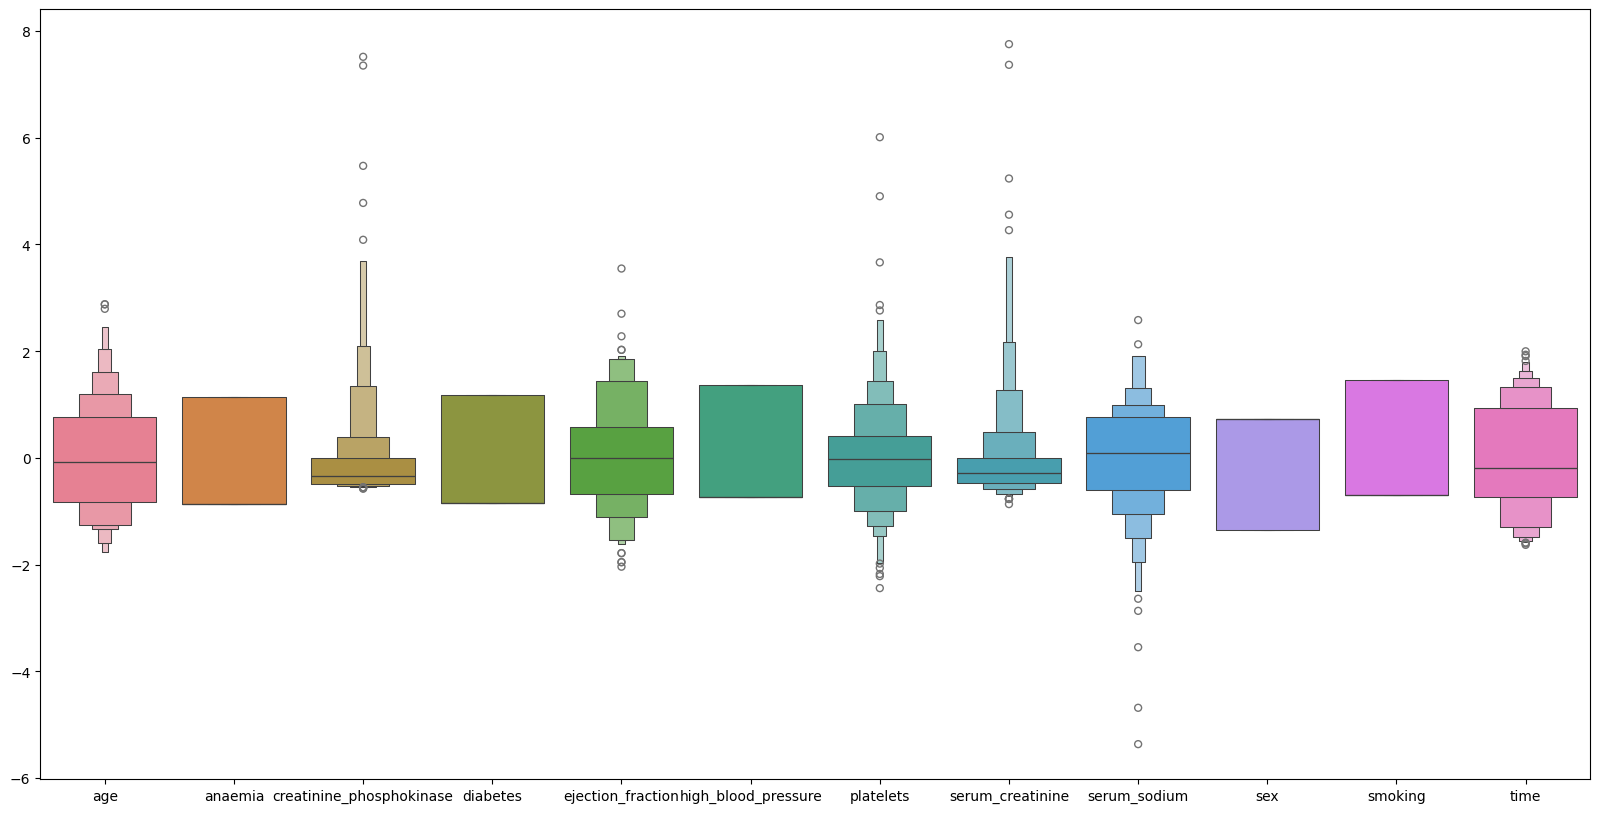

In [ ]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=x_scaled)
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3)

In [ ]:
modell1=svm.SVC()
modell1.fit(x_train,y_train)

SVC()

In [ ]:
## Hyperparameter Tuning with Grid Search

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear']}

# Create a GridSearchCV object
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2, scoring='accuracy')

# Fit the grid search to the training data
grid.fit(x_train, y_train)

# Print the best parameters and the corresponding best score
print("Best parameters found by Grid Search:")
print(grid.best_params_)
print("Best accuracy found by Grid Search:")
print(grid.best_score_)

# Get the best model from the grid search
best_grid_model = grid.best_estimator_

## Evaluate the best model on the test data

# Make predictions with the best model
y_pred_grid = best_grid_model.predict(x_test)

# Print the classification report for the best model
print("\nClassification Report for the Best Grid Search Model:")
print(classification_report(y_test, y_pred_grid))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

In [ ]:
y_pred=modell1.predict(x_test)

In [ ]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0])

In [ ]:
y_test

,DEATH_EVENT
49,1
46,1
56,0
138,0
87,0
...,...
290,0
257,0
181,1
261,0


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        61
           1       1.00      0.03      0.07        29

    accuracy                           0.69        90
   macro avg       0.84      0.52      0.44        90
weighted avg       0.79      0.69      0.57        90



In [ ]:
early_stopping=callbacks.EarlyStopping(min_delta=0.001,patience=20,restore_best_weights=True)
model=Sequential()
model.add(Dense(units=16,kernel_initializer='uniform',activation='relu',input_dim=12))
model.add(Dense(units=8,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=8,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 425 (1.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(x_train,y_train,validation_split=0.25,batch_size=25,epochs=100,callbacks=[early_stopping])

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6138 - loss: 0.6928 - val_accuracy: 0.6792 - val_loss: 0.6919
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6845 - loss: 0.6916 - val_accuracy: 0.6792 - val_loss: 0.6907
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6925 - loss: 0.6903 - val_accuracy: 0.6792 - val_loss: 0.6895
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6541 - loss: 0.6895 - val_accuracy: 0.6792 - val_loss: 0.6881
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6850 - loss: 0.6876 - val_accuracy: 0.6792 - val_loss: 0.6869
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7377 - loss: 0.6846 - val_accuracy: 0.6792 - val_loss: 0.6854
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6893 - loss: 0.6843 - val_accuracy: 0.6792 - val_loss: 0.6838
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7259 - loss: 0.6812 - val_accuracy: 0.6792 - val_loss: 0.6820

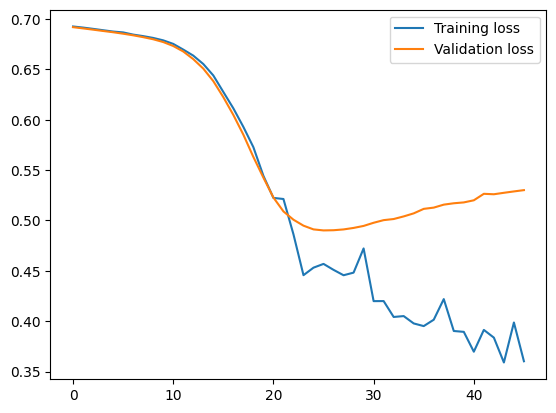

In [ ]:
history_df=pd.DataFrame(history.history)
plt.plot(history_df.loc[:,['loss']],label="Training loss")
plt.plot(history_df.loc[:,['val_loss']],label="Validation loss")
plt.legend()
plt.show()

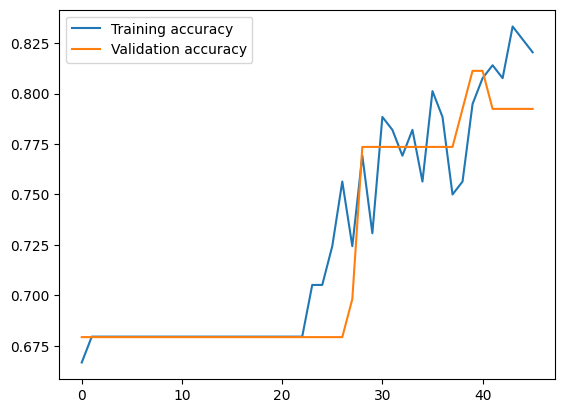

In [ ]:
plt.plot(history_df.loc[:,['accuracy']],label="Training accuracy")
plt.plot(history_df.loc[:,['val_accuracy']],label="Validation accuracy")
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [ ]:
y_pred=(y_pred>0.5)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        61
           1       1.00      0.03      0.07        29

    accuracy                           0.69        90
   macro avg       0.84      0.52      0.44        90
weighted avg       0.79      0.69      0.57        90

